## Doppler Shifts in Cen X-3 Chandra Observation

Within a Cen X-3 Chandra observation, some very prominent Doppler shifts in the Fe xxv central energy were observed in phase resolved analysis.

In this example, we will explore how these shifts are compatible with the emitting plasma's ballistic movement around the orbit.


In [1]:
import pytest
import numpy as np
import os
import sys

sys.path.append('/Users/graci/Desktop/git/xraybinaryorbit/xraybinaryorbit')
from xraybinaryorbit import *

/Users/graci/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (




HELLO, nice to see you! :)

PLEASE READ THIS, IT'S VERY IMPORTANT:

These are the units that must be used within this package:

- Rstar: Solar radius
- Mstar: Solar masses
- Inclination: Sexagesimal degrees
- Periapsis: Sexagesimal degrees
- Semimajor: Stellar radius
- Periods: Days (Periods in the case of the period_sliding_window function will support any units)
- Iphase: Radians

A list of the functions contained in this package will be displayed by runing the function list_functions().

As these functions use a lot of parameters, which can sometimes be difficult to handle, we have implemented a user-friendly method for parameter input:
A form will be displayed, and the parameters will be saved in the directory for further interactions. These saved parameters will be used if new parameters are not provided.
For the function to work, the submit button must be pressed.

Please, take into account that fits in general will take A LOT of time to complete.

If you need help, contact gra

In [2]:
# REAL DATA

# Known orbital phases for each time bin
phase_array = np.array([0.21901885, 0.24120082, 0.2522918 , 0.26338279, 0.27447377,
       0.28556475, 0.29665574, 0.30774672, 0.31883771, 0.32715595,
       0.33270144, 0.33824693, 0.35488341, 0.3604289 , 0.36597439,
       0.37706538, 0.38815636, 0.40479284, 0.41033833])

# Time bins: The beguining and end are provided. 
x = np.array([[7.97000557e+08, 7.97002557e+08],
       [7.97004557e+08, 7.97006557e+08],
       [7.97006557e+08, 7.97008557e+08],
       [7.97008557e+08, 7.97010557e+08],
       [7.97010557e+08, 7.97012557e+08],
       [7.97012557e+08, 7.97014557e+08],
       [7.97014557e+08, 7.97016557e+08],
       [7.97016557e+08, 7.97018557e+08],
       [7.97018557e+08, 7.97020557e+08],
       [7.97020557e+08, 7.97021557e+08],
       [7.97021557e+08, 7.97022557e+08],
       [7.97022557e+08, 7.97023557e+08],
       [7.97025557e+08, 7.97026557e+08],
       [7.97026557e+08, 7.97027557e+08],
       [7.97027557e+08, 7.97028557e+08],
       [7.97029557e+08, 7.97030557e+08],
       [7.97031557e+08, 7.97032557e+08],
       [7.97034557e+08, 7.97035557e+08],
       [7.97035557e+08, 7.97036557e+08]])

# Emission line evolution
y = np.array([6.68379, 6.80991, 6.67892, 6.70604, 6.59522, 6.69305, 6.78357,
       6.7602 , 6.71054, 6.59051, 6.58941, 6.6197 , 6.6798 , 6.73628,
       6.72427, 6.70338, 6.81985, 6.60144, 6.60003])



# Emission line evolution positive and negative errors
y_err = np.array([[0.01962, 0.01599, 0.0353 , 0.02163, 0.01522, 0.02066, 0.01784,
        0.0408 , 0.09066, 0.01051, 0.00941, 0.0344 , 0.0998 , 0.02562,
        0.02753, 0.03273, 0.08475, 0.02144, 0.02003],
       [0.09961, 0.01009, 0.04271, 0.02659, 0.12467, 0.01667, 0.03643,
        0.03073, 0.03159, 0.02861, 0.01781, 0.04638, 0.09535, 0.0397 ,
        0.03344, 0.10163, 0.00015, 0.06801, 0.04635]])



### In this observation, the Fe xxvi emission line energy exhibited remarkable Doppler shifts. In this example, we will utilize the fit_disc_ps function from the xraybinaryorb package to disentangle this intriguing behavior.

Text(0, 0.5, 'Fe xxi energy evolution')

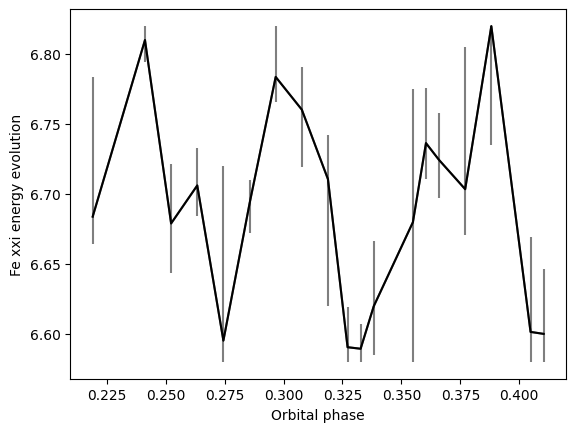

In [3]:
plt.errorbar(phase_array,y, yerr =y_err,fmt="k", alpha=0.5)
plt.errorbar(phase_array,y,fmt="k")
plt.xlabel("Orbital phase")
plt.ylabel("Fe xxi energy evolution")

# DISC IN ORBIT

In [ ]:
result, phase, dphase, predicted_data, r_squared = fit_disc_ps(x, y, y_err=y_err, 
                                                               num_iterations=2, maxiter = 100, swarmsize = 10, 
                                                               units="keV",method_="extended",
                                                               extended_binsize=0.01, load_directly=True)

plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

result

In [ ]:
result, phase, dphase, predicted_data, r_squared = fit_disc_ls(x, y, y_err=y_err,  
                                                               units="keV",method_="discrete",
                                                               extended_binsize=0.01, load_directly=True)


plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")


result

# SIMPLE ORBIT

In [ ]:
result, phase,  predicted_data, r_squared = fit_orbit_ps(x, y, y_err=y_err, 
                                                         num_iterations=2, maxiter = 100, swarmsize = 10, 
                                                         units="keV",method_="extended",
                                                         extended_binsize=0.01, load_directly=True)

plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

result

In [ ]:
result, phase, predicted_data, r_squared = fit_orbit_ls(x, y, y_err=y_err, 
                                                        units="keV",method_="discrete",
                                                        extended_binsize=0.01, load_directly=True)

plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

result

# SIMPLE SPIRAL

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


Name of the parameter,iphase_spiral,semimajor_spiral,b,omega,inclination_spiral,feature
Value,0.983919,46.563520,-0.316968,0.180879,87.360617,6.693066
Std,0.304381,3.946284,0.082774,0.099164,41.846161,0.000002


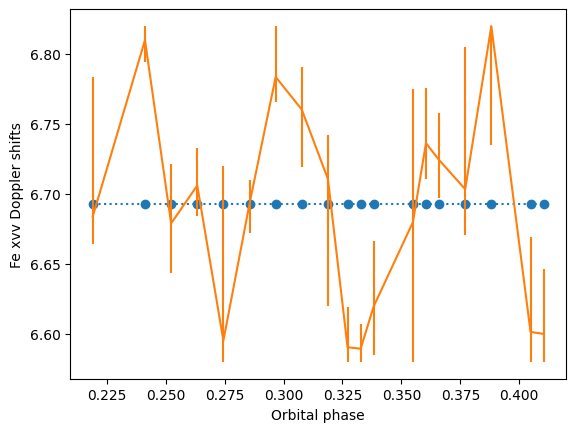

In [5]:
result, phase, predicted_data, r_squared = fit_spiral_ps(x, y, y_err=y_err, 
                                                         num_iterations=2, maxiter = 100, swarmsize = 10, 
                                                         units="keV",method_="extended",
                                                         extended_binsize=0.01, load_directly=True)

plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

result

The number of time points does not allow an extended approach. Changing to discrete
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


Name of the parameter,iphase_spiral,semimajor_spiral,b,omega,inclination_spiral,feature
Value,0.920401,2.748980,-0.998365,0.223852,41.240285,6.693165
Std,0.454262,42.174405,0.373667,0.111926,17.463430,0.000048


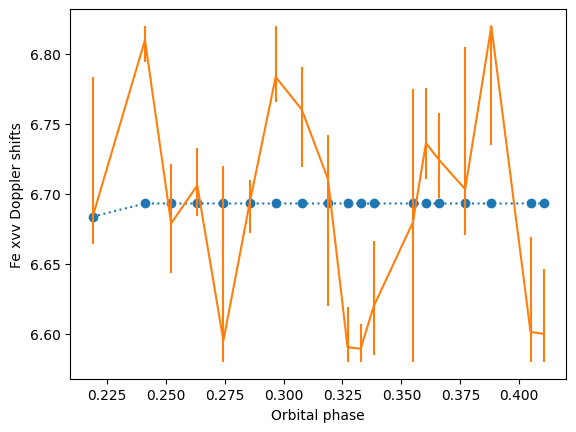

In [6]:
result, phase, predicted_data, r_squared = fit_spiral_ps(x, y, y_err=y_err, 
                                                         num_iterations=2, maxiter = 100, swarmsize = 10, 
                                                         units="keV",method_="discrete",
                                                         extended_binsize=0.01, load_directly=True)

plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

result

# SPIRAL IN ORBIT

In [ ]:
phase = np.arange(0,maxph,max(minsizebin/10,maxph/100000))
result, phase,predicted_data, r_squared = fit_spiral_in_orbit_ps(x, y, y_err=y_err, 
                                                                          num_iterations=2, maxiter = 100, swarmsize = 10,  
                                                                          units="keV",method_="extended",
                                                                          extended_binsize=0.01, load_directly=True)

plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

result

In [ ]:
result, phase, predicted_data, r_squared = fit_spiral_in_orbit_ls(x, y, y_err=y_err, 
                                                                          units="keV",method_="discrete",
                                                                          extended_binsize=0.01, load_directly=True)


plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

result